# Comparing Star Player Team vs No Star Player Attendance


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [56]:
#Importing files
star_attendance = pd.read_csv("Cleaned_Data/star_team_attendance.csv")
no_star_attendance = pd.read_csv("Cleaned_Data/no_star_team_attendance.csv")
star_attendance.set_index("Year")
no_star_attendance.set_index("Year")

,Team,Home AVG
Year,,
2015,Atlanta Hawks,17412
2015,Boston Celtics,17594
2015,Charlotte Hornets,17192
2015,Chicago Bulls,21866
2015,Dallas Mavericks,20188
...,...,...
2019,Brooklyn Nets,14941
2019,New York Knicks,19002
2019,Philadelphia 76ers,20453


In [57]:
stars_by_year = star_attendance.groupby("Year").mean()
no_stars_by_year = no_star_attendance.groupby("Year").mean()

In [63]:
comparing_attendance = pd.merge(stars_by_year, no_stars_by_year, on = "Year", suffixes= (" Stars", " No Stars"))
comparing_attendance

,Home AVG Stars,Home AVG No Stars
Year,,
2015,19037.142857,17457.695652
2016,19048.333333,17355.714286
2017,18227.111111,17656.608696
2018,18155.950000,17661.100000
2019,17873.416667,17727.666667


TypeError: only size-1 arrays can be converted to Python scalars

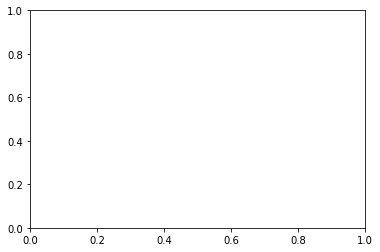

In [52]:
plt.bar(stars_by_year["Year"], stars_by_year["Home AVG"], align="center", color="red", width =.5)
plt.xlim(-1, len(star["Year"]))
# plt.ylim(500,25000)
plt.xlabel("Teams with a Star Player", fontweight="black") 
plt.ylabel("Average Fan Attendnace", fontweight="black") 
plt.title("NBA Regular Season Fan Attendnce ", fontweight="black") 
#Rotation and horizontal alligment of the team name labels
plt.xticks(rotation=30, ha='right')
# plt.legend()

# plt.tight_layout()
plt.show()